# Welcome!

Let's start this project by importing all the libraries we need, including *NumPy, Pandas, Matplotlib, and Sci-Kit Learn!*

In [656]:
# let's import any libraries that we need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Now we're going to want to load in our dataset, reset the index (to avoid a intermittent error), and print out the first few lines.

In [657]:
df = pd.read_csv('data/AppleStore.csv', index_col=0)
df.reset_index()
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Great, we have our data, now let's remove some rows that we won't be needing. We don't need the app's ID, how big of file it is, what version it's on, etc...

Let's also use the info() function to see what our data-cleaning might involve.

In [658]:
df = df.drop(columns=['id','size_bytes','currency','rating_count_ver','user_rating_ver','ver','vpp_lic','track_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 8 columns):
price               7197 non-null float64
rating_count_tot    7197 non-null int64
user_rating         7197 non-null float64
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 506.0+ KB


Sweet, no data cleaning needed! Let's make a histogram of what category each of the apps fall into... huh, looks like a lot of games on the App Store!

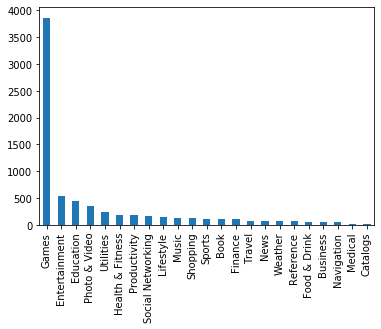

In [659]:
df['prime_genre'].value_counts().plot(kind='bar');

Let's one-hot the genre of the app (game, education, social networking, etc...) and the content rating (4 years and older, 17 years and older, etc...). Then, let's set our y-array to be the user_ratings of the apps, since that is what we eventually want to predict. Lastly, let's drop the columns that we one-hotted and print out some info on our new dataframes.

In [660]:
# one hot the genre of the app (game, education, social networking, etc...)
one_hot = pd.get_dummies(df['prime_genre'])
one_hot2 = pd.get_dummies(df['cont_rating'])
one_hot = one_hot.join(one_hot2)

y = df['user_rating']

# drop the categorical and target variables so that all that is left in df is explanatory numerical variables
df = df.drop(columns = ['prime_genre', 'cont_rating'])

# Great! Now we have all numerical data
# let's see our new columns
print("Numerical data: ")
print(df.info())
print("Categorical data: ")
print(one_hot.info())

Numerical data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 6 columns):
price               7197 non-null float64
rating_count_tot    7197 non-null int64
user_rating         7197 non-null float64
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(2), int64(4)
memory usage: 713.6 KB
None
Categorical data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 27 columns):
Book                 7197 non-null uint8
Business             7197 non-null uint8
Catalogs             7197 non-null uint8
Education            7197 non-null uint8
Entertainment        7197 non-null uint8
Finance              7197 non-null uint8
Food & Drink         7197 non-null uint8
Games                7197 non-null uint8
Health & Fitness     7197 non-null uint8
Lifestyle            7197 non-null uint8
Medical              7197 non-null uin

Let's try using a linear .corr() to see what type of correlation we get! Then let's extract the relevant features and print them out.

In [661]:
corr = df.corr()['user_rating'].sort_values(ascending=False)
relevant_features = corr[abs(corr) > 0.07]
print(relevant_features.sort_values(ascending=False))

user_rating         1.000000
ipadSc_urls.num     0.265671
lang.num            0.170976
rating_count_tot    0.083310
Name: user_rating, dtype: float64


Luckily we don't have a whole lot of features, which makes our sns pairplot super fast! Let's make that plot now.

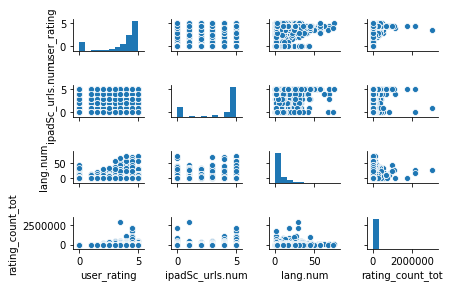

In [662]:
sns.pairplot(df[relevant_features.index], height = 1, aspect=1.5);

Let's run a linear regression on our data and see what we get:

In [663]:
X = df.drop('user_rating', axis = 1)

model = LinearRegression()
model.fit(X,y)

print(f"m = {model.coef_}")
print(f"b = {model.intercept_}")
print()
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

m = [ 7.97906197e-03  1.23396934e-06 -9.83910819e-03  1.90636970e-01
  2.67671511e-02]
b = 3.0126923594856105

Adjusted R^2: 0.09710024406778606


Hmm that last linear Adjusted R^2 looks pretty low... let's plot our data to see what's going on.

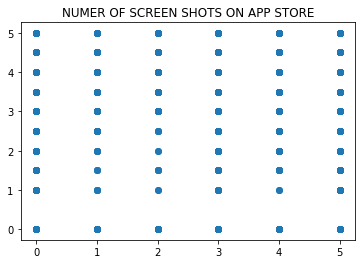

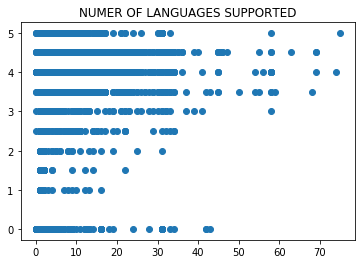

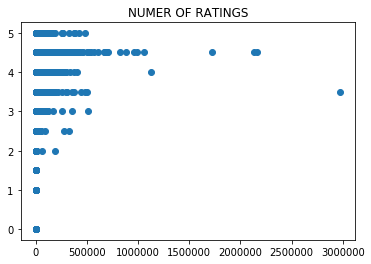

In [664]:
y_scatter = y

ax = plt.subplot()
x_scatter = X['ipadSc_urls.num']
plt.scatter(x_scatter,y_scatter)
plt.title('NUMER OF SCREEN SHOTS ON APP STORE')
plt.show()

ax = plt.subplot()
x_scatter = X['lang.num']
plt.scatter(x_scatter,y_scatter)
plt.title('NUMER OF LANGUAGES SUPPORTED')
plt.show()

ax = plt.subplot()
x_scatter = X['rating_count_tot']
plt.scatter(x_scatter,y_scatter)
plt.title('NUMER OF RATINGS')
plt.show()

Well, we've certainly got some odd looking data! Oh well, let's do our best with the polynomial regresson and see how it goes. Just for fun, let's try fitting a 4th degree polynomial to the number of languages supported:

3.1011097619142647
[ 0.00000000e+00  1.60378392e-01 -7.74977341e-03  1.29608542e-04
 -6.83061254e-07]


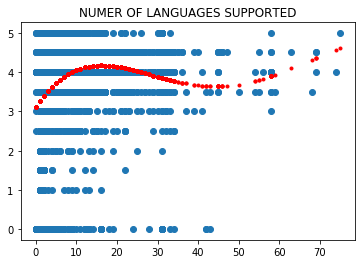

In [665]:
# Set up the plot
fig,ax = plt.subplots(1,1)

x_data = X['lang.num']
y_data = y
x_data = x_data[:, np.newaxis]

# Set the degree of our polynomial and fit the model
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x_data, y_data)
print(model[1].intercept_)
print(model[1].coef_)

# Output the data
plt.scatter(x_data,y_data)
plt.title('NUMER OF LANGUAGES SUPPORTED')
plt.plot(x_data, model.predict(x_data), '.', color='red', label="label");

Enough fun for now. Let's find what polynomial fits the numerical explanatory data the best (we'll do the one-hot data later).

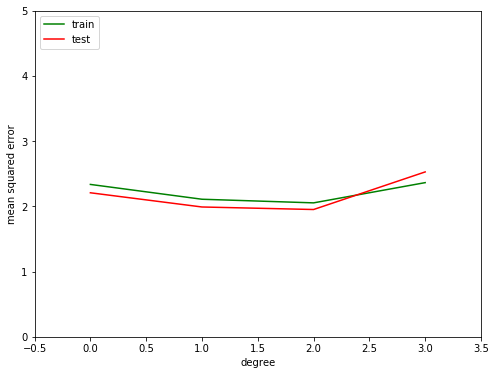

In [666]:
df = df.drop(columns = ['user_rating'])
degrees = 4 # up to degree 4

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25) # 25% of the data goes to testing

train_error = []
test_error = []

for degree in range(degrees): # itterate through each possible degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.xlim((-.5,3.5))
plt.ylim((0,5))
plt.legend(loc='upper left');

Well, it looks like 2 is the best degree (since the train/test sets are random, it can sometimes look like 1). Because the error go up after 2, we won't use any higher powers. So now, let's use a polynomial of degree 2 to populate our dataframe with the original columns, columns squared, and interaction columns. The StandardScaler will then convert the numbers into Z-scores. Lastly, let's fit the data and print out the head.

In [667]:
# Let's make a pipeline to create polynomial features, and scale the data (all in one line!)
model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(df)
transformed_X = pd.DataFrame(model.transform(df))

# Let's print out what we've got
transformed_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 21 columns):
0     7197 non-null float64
1     7197 non-null float64
2     7197 non-null float64
3     7197 non-null float64
4     7197 non-null float64
5     7197 non-null float64
6     7197 non-null float64
7     7197 non-null float64
8     7197 non-null float64
9     7197 non-null float64
10    7197 non-null float64
11    7197 non-null float64
12    7197 non-null float64
13    7197 non-null float64
14    7197 non-null float64
15    7197 non-null float64
16    7197 non-null float64
17    7197 non-null float64
18    7197 non-null float64
19    7197 non-null float64
20    7197 non-null float64
dtypes: float64(21)
memory usage: 1.2 MB


Epic! Now, let's add back in those one_hot values that we've *almost* forgotten about!

In [668]:
# first, we need to reset both of these indexes. This is a little messey, but it works for what we need.
one_hot.index = range(len(one_hot.index))
transformed_X.index = range(len(transformed_X.index))

# Let's join our two DataFrames, and print out our new one to make sure it looks good.
X = one_hot.join(transformed_X, how='outer')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 48 columns):
Book                 7197 non-null uint8
Business             7197 non-null uint8
Catalogs             7197 non-null uint8
Education            7197 non-null uint8
Entertainment        7197 non-null uint8
Finance              7197 non-null uint8
Food & Drink         7197 non-null uint8
Games                7197 non-null uint8
Health & Fitness     7197 non-null uint8
Lifestyle            7197 non-null uint8
Medical              7197 non-null uint8
Music                7197 non-null uint8
Navigation           7197 non-null uint8
News                 7197 non-null uint8
Photo & Video        7197 non-null uint8
Productivity         7197 non-null uint8
Reference            7197 non-null uint8
Shopping             7197 non-null uint8
Social Networking    7197 non-null uint8
Sports               7197 non-null uint8
Travel               7197 non-null uint8
Utilities            7197 non-nu

Looking great! Now we can actually run our RidgeCV regresson!

In [669]:
model = RidgeCV(cv=10, alphas = [0.00001,0.1,1])
model.fit(X,y)

print("Score: ", model.score(X,y))
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Score:  0.14931316265989836
Intercept:  3.344241804776372
Coefficients:  [-0.61711887  0.15460622 -0.94485767 -0.20481925  0.06643141 -0.43155147
  0.13093605  0.16766004  0.38858189 -0.15365301  0.04219332  0.40340429
 -0.57739222 -0.03820886  0.35131622  0.46298432  0.05000685  0.49093104
  0.00314916 -0.1804741   0.14736801  0.08822159  0.20028504  0.09428109
 -0.37838215  0.08874985  0.19535121  0.          0.16855196  0.498632
 -0.36123435 -0.06486447  0.11517428 -0.05979294  0.01287109  0.05842462
 -0.13215651 -0.01027929 -0.17886599 -0.03174538 -0.14481574 -0.14164848
  0.26667599  0.1612851   0.41119283  0.27609638 -0.1050862  -0.25515127]


And there we have it! There's sure a lot of coefficients, but that's just because we have a whole lot of categorical and polynomial feature data.